In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%run -i runup_funcs.py
%run -i wave_funcs.py

drv, _ = which_computer()
print(drv)

C:/


In [2]:
df_hom = pd.read_csv(drv+'crs/proj/2022_runup/hom_stats.csv', delim_whitespace=True, index_col=0, header=0).T
df_hom

var,H_s,T_p,Dir,Dir_scaled,H0L0,Iribarren,WL,subtidal,tides,runup,runup95,TWL,TWL95
mean,0.969,6.08,22.6,21.1,79.0,0.992,-0.0278,-0.0278,-0.000145,0.696,0.973,0.669,0.945
std,0.606,1.95,46.7,43.8,69.9,0.274,0.8450,0.0941,0.829000,0.378,0.528,0.923,0.993
5,0.323,3.21,44.8,39.1,16.4,0.639,-1.2900,-0.1830,-1.230000,0.247,0.346,-0.743,-0.571
16,0.454,4.08,43.4,36.2,26.1,0.729,-1.0000,-0.1050,-0.960000,0.359,0.502,-0.370,-0.148
50,0.812,5.92,19.8,22.2,58.5,0.948,-0.0218,-0.0258,0.005960,0.613,0.857,0.683,0.955
85,1.520,8.16,57.7,63.6,133.0,1.270,0.9560,0.0505,0.973000,1.050,1.470,1.670,1.980
95,2.110,9.52,45.4,52.5,210.0,1.500,1.2400,0.1200,1.240000,1.420,1.990,2.120,2.560
99,3.100,11.20,45.5,48.8,349.0,1.820,1.5000,0.2320,1.480000,1.940,2.720,2.690,3.340


In [3]:
Hs95= df_hom['H_s']['95']
Tp95 = df_hom['T_p']['95']
print(Hs95, Tp95)

2.11 9.52


In [4]:
df = pd.read_csv(drv+'crs/proj/2022_runup/cape_profiles.csv', na_values = 'NaN')
#df = df.drop(df.columns[[23]], axis=1) # extra column because of final comma
df.describe()

,pno,lon,lat,beachslope,nsslope,slz,slx,dlz,dlx,nbars
count,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.000000
mean,3612.014286,-70.018529,41.919279,0.097407,0.015050,9.800000e-01,1926.591857,4.693714,1977.377571,2.214286
std,23.027075,0.091703,0.135975,0.041468,0.006132,3.354718e-16,1002.861175,1.187603,996.898588,1.019987
min,3573.000000,-70.245000,41.671400,0.021200,0.003700,9.800000e-01,284.550000,1.570000,309.550000,0.000000
25%,3592.250000,-70.077000,41.798875,0.074575,0.011850,9.800000e-01,1409.905000,4.007500,1457.557500,2.000000
50%,3612.500000,-69.985000,41.945200,0.089350,0.014350,9.800000e-01,1614.870000,4.650000,1654.870000,2.000000
75%,3630.750000,-69.937500,42.050125,0.118875,0.017100,9.800000e-01,2005.282500,5.437500,2076.547500,3.000000
max,3653.000000,-69.929000,42.080800,0.262200,0.047800,9.800000e-01,6444.620000,8.070000,6512.120000,5.000000


In [5]:
lat = df['lat'].values
lon = df['lon'].values
nb = df['nbars'].values

bs1 = df['bs1'].values.astype('float')
bz1 = df['bz1'].values.astype('float')
bs2 = df['bs2'].values.astype('float')
bz2 = df['bz2'].values.astype('float')
bs3 = df['bs3'].values.astype('float')
bz3 = df['bz3'].values.astype('float')
bs4 = df['bs4'].values.astype('float')
bz4 = df['bz4'].values.astype('float')
bs5 = df['bs5'].values.astype('float')
bz5 = df['bz5'].values.astype('float')
bx1 = df['bx1'].values.astype('float')
bx2 = df['bx2'].values.astype('float')
bx3 = df['bx3'].values.astype('float')
bx4 = df['bx4'].values.astype('float')
bx5 = df['bx5'].values.astype('float')

bslope = df['beachslope'].values.astype('float')
nsslope = df['nsslope'].values.astype('float')

slz = df['slz'].values.astype('float')
slx = df['slx'].values.astype('float')
dlz = df['dlz'].values.astype('float')
dlx = df['dlx'].values.astype('float')

In [6]:
print('Bar 1')
stat_summary(bs1, iprint=True)
print()
print('Bar 2')
stat_summary(bs2, iprint=True)
print()
print('Bar 3')
stat_summary(bs3, iprint=True)
print()
print('Bar 4')
stat_summary(bs4, iprint=True)
print()
print('Bar 5')
stat_summary(bs5, iprint=True)
print()

Bar 1
  n, nnan, nvalid:  70 2 68
  mean, std, min, max   : 0.020 0.010 0.003 0.047
  d5, d25, d50, d75, d95: 0.008 0.013 0.018 0.026 0.037

Bar 2
  n, nnan, nvalid:  70 14 56
  mean, std, min, max   : 0.012 0.003 0.005 0.020
  d5, d25, d50, d75, d95: 0.006 0.010 0.012 0.013 0.018

Bar 3
  n, nnan, nvalid:  70 49 21
  mean, std, min, max   : 0.010 0.002 0.005 0.014
  d5, d25, d50, d75, d95: 0.006 0.007 0.010 0.012 0.012

Bar 4
  n, nnan, nvalid:  70 62 8
  mean, std, min, max   : 0.008 0.002 0.006 0.012
  d5, d25, d50, d75, d95: 0.006 0.007 0.009 0.009 0.011

Bar 5
  n, nnan, nvalid:  70 68 2
  mean, std, min, max   : 0.007 0.001 0.006 0.009
  d5, d25, d50, d75, d95: 0.006 0.007 0.007 0.008 0.009



[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05 ]


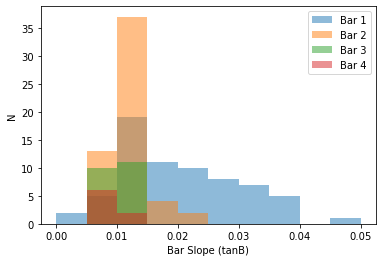

In [7]:

bcols = ['#ffffcc','#a1dab4','#41b6c4','#2c7fb8','#253494']
bins = np.arange(0.,.055, .005)
print(bins)
plt.hist(bs1, alpha = .5, bins = bins, label='Bar 1')
plt.hist(bs2, alpha = .5, bins = bins, label='Bar 2')
plt.hist(bs3, alpha = .5, bins = bins, label='Bar 3')
plt.hist(bs4, alpha = .5, bins = bins, label='Bar 4')
# plt.hist(bs1, alpha = .5, bins = bins, color = bcols[1])
# plt.hist(bs2, alpha = .5, bins = bins, color = bcols[2])
# plt.hist(bs3, alpha = .5, bins = bins, color = bcols[3])
# plt.hist(bs4, alpha = .5, bins = bins, color = bcols[4])
# plt.hist(bs1, bins = bins, label='Bar 1', histtype='step', linewidth=2.5, color = bcols[1] )
# plt.hist(bs2, bins = bins, label='Bar 2', histtype='step', linewidth=2.5, color = bcols[2] )
# plt.hist(bs3, bins = bins, label='Bar 3', histtype='step', linewidth=2.5, color = bcols[3] )
# plt.hist(bs4, bins = bins, label='Bar 4', histtype='step', linewidth=2.5, color = bcols[4] )
plt.xlabel('Bar Slope (tanB)')
plt.ylabel('N')
plt.legend()
# plt.savefig("drv+'crs/proj/2022_Runup/barslope_hist.svg', dpi=200)

In [8]:
print(np.tan(0.01))

0.010000333346667207


In [9]:
# Use median wave height and period, calculate range of runup based on bar slopes
s06r2 = np.nan*np.ones_like(bs1)
brun1 = np.nan*np.ones_like(bs1)
lrun1 = np.nan*np.ones_like(bs1)
print('Hs95: {}  Tp95: {}'.format(Hs95,Tp95))
Lo95 = calc_L0(Tp95)
print('Lo95: ',Lo95)
Ess, f, df = jonswap_ess(Hs95, Tp95)
for i, barslope in enumerate(bs1):
    if(nb[i]>0):

        brun1[i], S, setup, Sinc, SIG, ir, R16R  = calcR2_Raubenheimer(Hs95, Tp95 , bslope[i], barslope)
        lrun1[i] = two_slope_IPA_free(Ess, f, df, bslope[i], barslope)
        s06r2[i] = S06(Hs95, Lo95, bslope[i] )
        #print(bslope[i], barslope, s06r2[i], brun1[i], lrun1[i])


Hs95: 2.11  Tp95: 9.52
Lo95:  141.5021490746219


Text(0.5, 0, 'Formula')

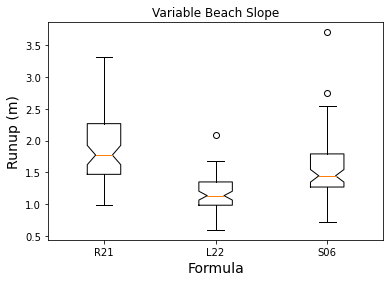

In [10]:
ok = np.argwhere( np.isfinite(brun1+lrun1+s06r2))
res = np.hstack((brun1[ok],lrun1[ok],s06r2[ok]))
plt.title('Variable Beach Slope')
plt.boxplot(res, notch=True)
#plt.ylim([0,1.5])
plt.ylabel('Runup (m)', fontsize=14)
['R21','L22','S06']
plt.xticks([1,2,3], ['R21','L22','S06'])
plt.xlabel('Formula',fontsize=14)
#plt.savefig(drv+'crs/proj/2022_Runup/bar_variable_slope_runup_boxplot.svg', dpi=200)

In [11]:
# Do the same thing, but keep beach slope constant
s06sr2 = np.nan*np.ones_like(bs1)
bruns1 = np.nan*np.ones_like(bs1)
lruns1 = np.nan*np.ones_like(bs1)
print('Hs95: {}  Tp95: {}'.format(Hs95,Tp95))
Lo95 = calc_L0(Tp95)
print('Lo95: ',Lo95)
beach_slope = 0.1 # median of RC profiles
Ess, f, df = jonswap_ess(Hs95, Tp95)
for i, barslope in enumerate(bs1):
    if(nb[i]>0):

        bruns1[i], S, setup, Sinc, SIG, ir, R16R  = calcR2_Raubenheimer(Hs95, Tp95 , beach_slope, barslope)
        lruns1[i] = two_slope_IPA_free(Ess, f, df, beach_slope, barslope)
        s06sr2[i] = S06(Hs95, Lo95, beach_slope )
        #print(bslope[i], barslope, s06r2[i], brun1[i], lrun1[i])

Hs95: 2.11  Tp95: 9.52
Lo95:  141.5021490746219


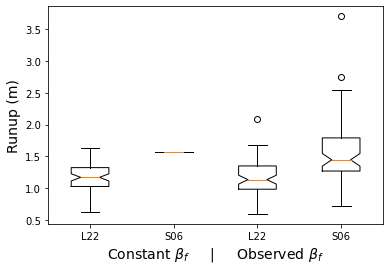

In [12]:
ok = np.argwhere( np.isfinite(brun1+lrun1+s06r2))
res = np.hstack((lruns1[ok], s06sr2[ok], lrun1[ok], s06r2[ok]))
#plt.title('Constant and Variable Beach Slope')
plt.boxplot(res, notch=True)
#plt.ylim([0,1.5])
plt.ylabel('Runup (m)', fontsize=14)
plt.xticks([1,2,3,4], ['L22','S06','L22','S06'])
plt.xlabel(r'Constant $\beta_f$     |     Observed $\beta_f$',fontsize=14)
plt.savefig(drv+'crs/proj/2022_Runup/bar_fixed_slope_runup_boxplot.svg', dpi=200)

In [13]:
ok = np.argwhere(np.isfinite(bs1))
np.shape([bslope[ok], bs1[ok]])
cc = np.corrcoef(np.squeeze([bslope[ok], bs1[ok]]))
print(cc)

[[1.         0.17350259]
 [0.17350259 1.        ]]


Text(0, 0.5, 'Bar Slope')

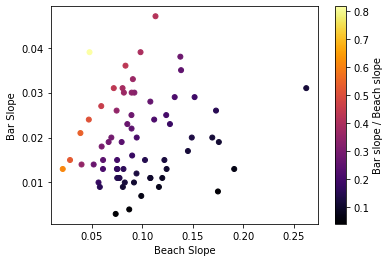

In [14]:
plt.scatter(bslope[ok],bs1[ok],s=25, c=bs1[ok]/bslope[ok],cmap='inferno')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Bar slope / Beach slope', rotation=90)
plt.xlabel('Beach Slope')
plt.ylabel('Bar Slope')
# plt.savefig(drv+'crs/proj/2022_Runup/beachslope_barslope_scatter.svg', dpi=200)

  n, nnan, nvalid:  70 2 68
  mean, std, min, max   : 0.238 0.149 0.041 0.818
  d5, d25, d50, d75, d95: 0.069 0.123 0.201 0.308 0.522


{'n': 70,
 'nnan': 2,
 'nvalid': 68,
 'mean': 0.23759755607443195,
 'std': 0.14927780992557865,
 'min': 0.04076086956521739,
 'max': 0.8176100628930818,
 'd5': 0.06903651004422137,
 'd25': 0.12263087584537027,
 'd50': 0.20113268608414242,
 'd75': 0.30756387802203194,
 'd95': 0.5220332634102487}

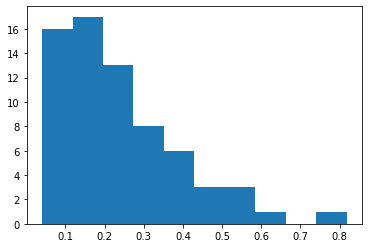

In [15]:
plt.hist(bs1/bslope)
stat_summary(bs1/bslope, iprint=True)

In [16]:
# high tide slope (not sure I trust this...these are very steep)
tide = 1.12

# lower of shoreline+tide or dune low
rise = np.minimum(slz+tide,dlz)-bz1
# (lower of distance to dune line or tide on beach slope) minus bar x
run = np.minimum(dlx,slx-tide/bslope)-bx1
ht_slope = rise/run
_ = stat_summary(ht_slope, iprint=True)

  n, nnan, nvalid:  70 2 68
  mean, std, min, max   : 0.043 0.068 0.003 0.532
  d5, d25, d50, d75, d95: 0.013 0.016 0.028 0.044 0.091


Text(0.5, 1.0, 'Bar Slope')

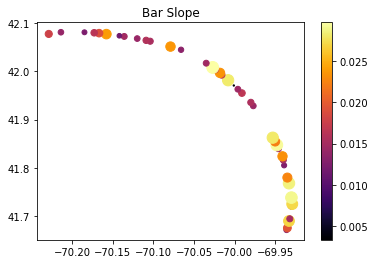

In [17]:
# trim off really big ones
ok = np.argwhere(ht_slope<=.03)
plt.scatter(lon[ok],lat[ok],(400*ht_slope[ok])**2,ht_slope[ok],cmap='inferno')
plt.colorbar()
plt.title('Bar Slope')

Text(0.5, 1.0, 'Number of Bars')

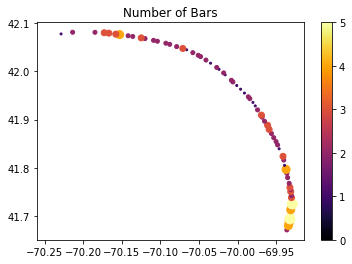

In [18]:
plt.scatter(lon,lat,4*nb**2,nb,cmap='inferno')
plt.colorbar()
plt.title('Number of Bars')

In [23]:
# for the plot, find a examples of 1 - 5 bars.
print(nb)
print(nb[0]) #2
print(nb[2]) #4
print(nb[5]) #5
print(nb[18]) #1
print(nb[7]) #3

[2 2 4 4 4 5 4 3 5 3 2 3 2 3 2 2 2 4 1 2 3 1 2 2 2 2 3 3 2 2 3 2 1 1 2 2 1
 1 1 2 2 1 2 1 2 1 2 2 2 2 1 3 2 2 2 2 2 2 3 2 2 4 3 3 3 2 2 1 0 0]
2
4
5
1
3


0.7443115462311541


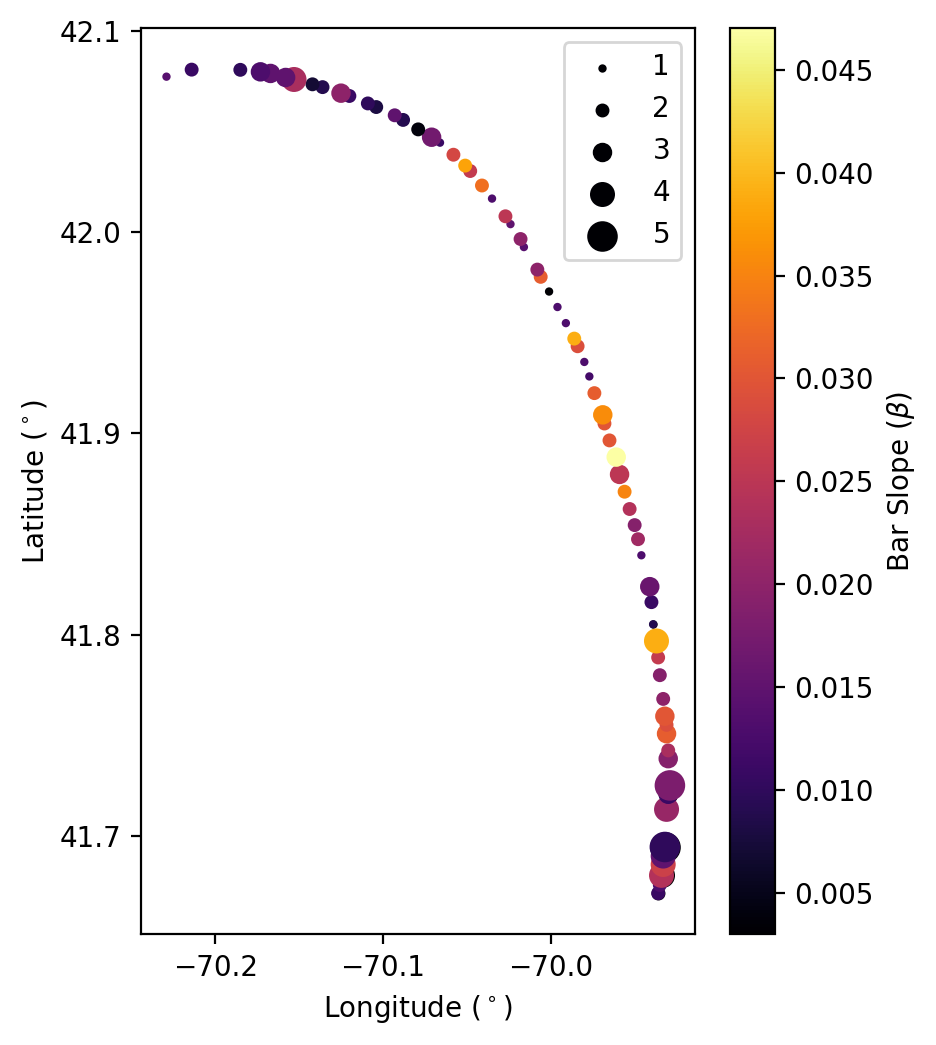

In [25]:
# xfac is crude aspect ratio for lat/lon plot
xfac=np.cos(41.9*np.pi/180)
print(xfac)
ysize = 6
xsize = xfac*ysize
# get rid of a few big slopes
ok = np.argwhere(bs1<=.08)

fig = plt.figure(figsize=(xsize,ysize), dpi=200)
plt.scatter(lon[18],lat[18],4*nb[18]**2,bs1[18],cmap='inferno', label='1')
plt.scatter(lon[0],lat[0],4*nb[0]**2,bs1[0],cmap='inferno', label='2')
plt.scatter(lon[7],lat[7],4*nb[7]**2,bs1[7],cmap='inferno', label='3')
plt.scatter(lon[2],lat[2],4*nb[2]**2,bs1[2],cmap='inferno', label='4')
plt.scatter(lon[5],lat[5],4*nb[5]**2,bs1[5],cmap='inferno', label='5')


# for i, numbar in enumerate(nb):
#     plt.text(lon[i]+.008,lat[i]+.005,str(numbar))
plt.scatter(lon[ok],lat[ok],4*nb[ok]**2,bs1[ok],cmap='inferno')

cbar = plt.colorbar()
plt.xlabel(r'Longitude ($^\circ$)')
plt.ylabel(r'Latitude ($^\circ$)')
plt.xticks(np.arange(-70.2, -69.9,.1))
cbar.ax.set_ylabel(r'Bar Slope ($\beta$)', rotation=90)
plt.legend()
plt.savefig(drv+'crs/proj/2022_Runup/cc_bar_slope_nbars.svg', dpi=200)

Text(0, 0.5, 'bar slope')

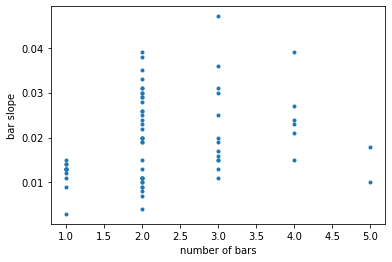

In [20]:
# is there a correlation between slope and number of bars
plt.plot(nb,bs1,'.')
plt.xlabel('number of bars')
plt.ylabel('bar slope')